# Lab 01 - Machine Learning
**Course:** BS(AI) - F23 | **Semester:** 5th  
**Lab Coordinator:** Ms. Sana Saleem  
**Course Instructor:** Dr. Abid Ali  
**Deadline:** 12th September 2025

## Dataset: Titanic Survival Prediction
This dataset contains information about passengers on the Titanic, including missing values that we'll handle through preprocessing.


## Task 1: Import Required Libraries and Load Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [2]:
# Load the Titanic dataset
# We'll use a URL to load the dataset directly
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
df.head()


Dataset loaded successfully!
Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Task 2: Dataset Exploration and Information


In [3]:
# Basic dataset information
print("=== DATASET INFORMATION ===")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)

print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])


=== DATASET INFORMATION ===
Shape: (891, 12)

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

=== MISSING VALUES ===
          Missing Count  Missing Percentage
Age                 177           19.865320
Cabin               687           77.104377
Embarked              2            0.224467


In [4]:
# Statistical summary
print("=== STATISTICAL SUMMARY ===")
df.describe()


=== STATISTICAL SUMMARY ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Task 3: Data Preprocessing


In [5]:
# Create a copy for preprocessing
df_processed = df.copy()

print("=== PREPROCESSING STEPS ===")
print("1. Handling missing values...")

# Handle missing values in Age column (fill with median)
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
print(f"   - Age: Filled {df['Age'].isnull().sum()} missing values with median")

# Handle missing values in Embarked column (fill with mode)
df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)
print(f"   - Embarked: Filled {df['Embarked'].isnull().sum()} missing values with mode")

# Handle missing values in Cabin column (fill with 'Unknown')
df_processed['Cabin'].fillna('Unknown', inplace=True)
print(f"   - Cabin: Filled {df['Cabin'].isnull().sum()} missing values with 'Unknown'")

# Drop PassengerId, Name, and Ticket as they're not useful for prediction
df_processed = df_processed.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
print("   - Dropped PassengerId, Name, and Ticket columns")

print("\n2. Encoding categorical variables...")
# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
le_cabin = LabelEncoder()

df_processed['Sex'] = le_sex.fit_transform(df_processed['Sex'])
df_processed['Embarked'] = le_embarked.fit_transform(df_processed['Embarked'])
df_processed['Cabin'] = le_cabin.fit_transform(df_processed['Cabin'])

print("   - Encoded Sex, Embarked, and Cabin columns")

print("\n3. Final dataset shape:")
print(f"   - Shape: {df_processed.shape}")
print(f"   - Missing values: {df_processed.isnull().sum().sum()}")

df_processed.head()


=== PREPROCESSING STEPS ===
1. Handling missing values...
   - Age: Filled 177 missing values with median
   - Embarked: Filled 2 missing values with mode
   - Cabin: Filled 687 missing values with 'Unknown'
   - Dropped PassengerId, Name, and Ticket columns

2. Encoding categorical variables...
   - Encoded Sex, Embarked, and Cabin columns

3. Final dataset shape:
   - Shape: (891, 9)
   - Missing values: 0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,147,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,147,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,147,2


## Task 4: Correlation Analysis


In [6]:
# Calculate correlation matrix
correlation_matrix = df_processed.corr()

print("=== CORRELATION WITH TARGET VARIABLE (Survived) ===")
target_correlations = correlation_matrix['Survived'].sort_values(ascending=False)
print(target_correlations)

# Display correlation matrix
print("\n=== FULL CORRELATION MATRIX ===")
print(correlation_matrix.round(3))


=== CORRELATION WITH TARGET VARIABLE (Survived) ===
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Embarked   -0.167675
Cabin      -0.254888
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

=== FULL CORRELATION MATRIX ===
          Survived  Pclass    Sex    Age  SibSp  Parch   Fare  Cabin  Embarked
Survived     1.000  -0.338 -0.543 -0.065 -0.035  0.082  0.257 -0.255    -0.168
Pclass      -0.338   1.000  0.132 -0.340  0.083  0.018 -0.549  0.684     0.162
Sex         -0.543   0.132  1.000  0.081 -0.115 -0.245 -0.182  0.097     0.108
Age         -0.065  -0.340  0.081  1.000 -0.233 -0.172  0.097 -0.241    -0.019
SibSp       -0.035   0.083 -0.115 -0.233  1.000  0.415  0.160  0.044     0.068
Parch        0.082   0.018 -0.245 -0.172  0.415  1.000  0.216 -0.028     0.040
Fare         0.257  -0.549 -0.182  0.097  0.160  0.216  1.000 -0.503    -0.225
Cabin       -0.255   0.684  0.097 -0.241  0.044 -0.028 -0.503  

## Task 5: Data Visualization


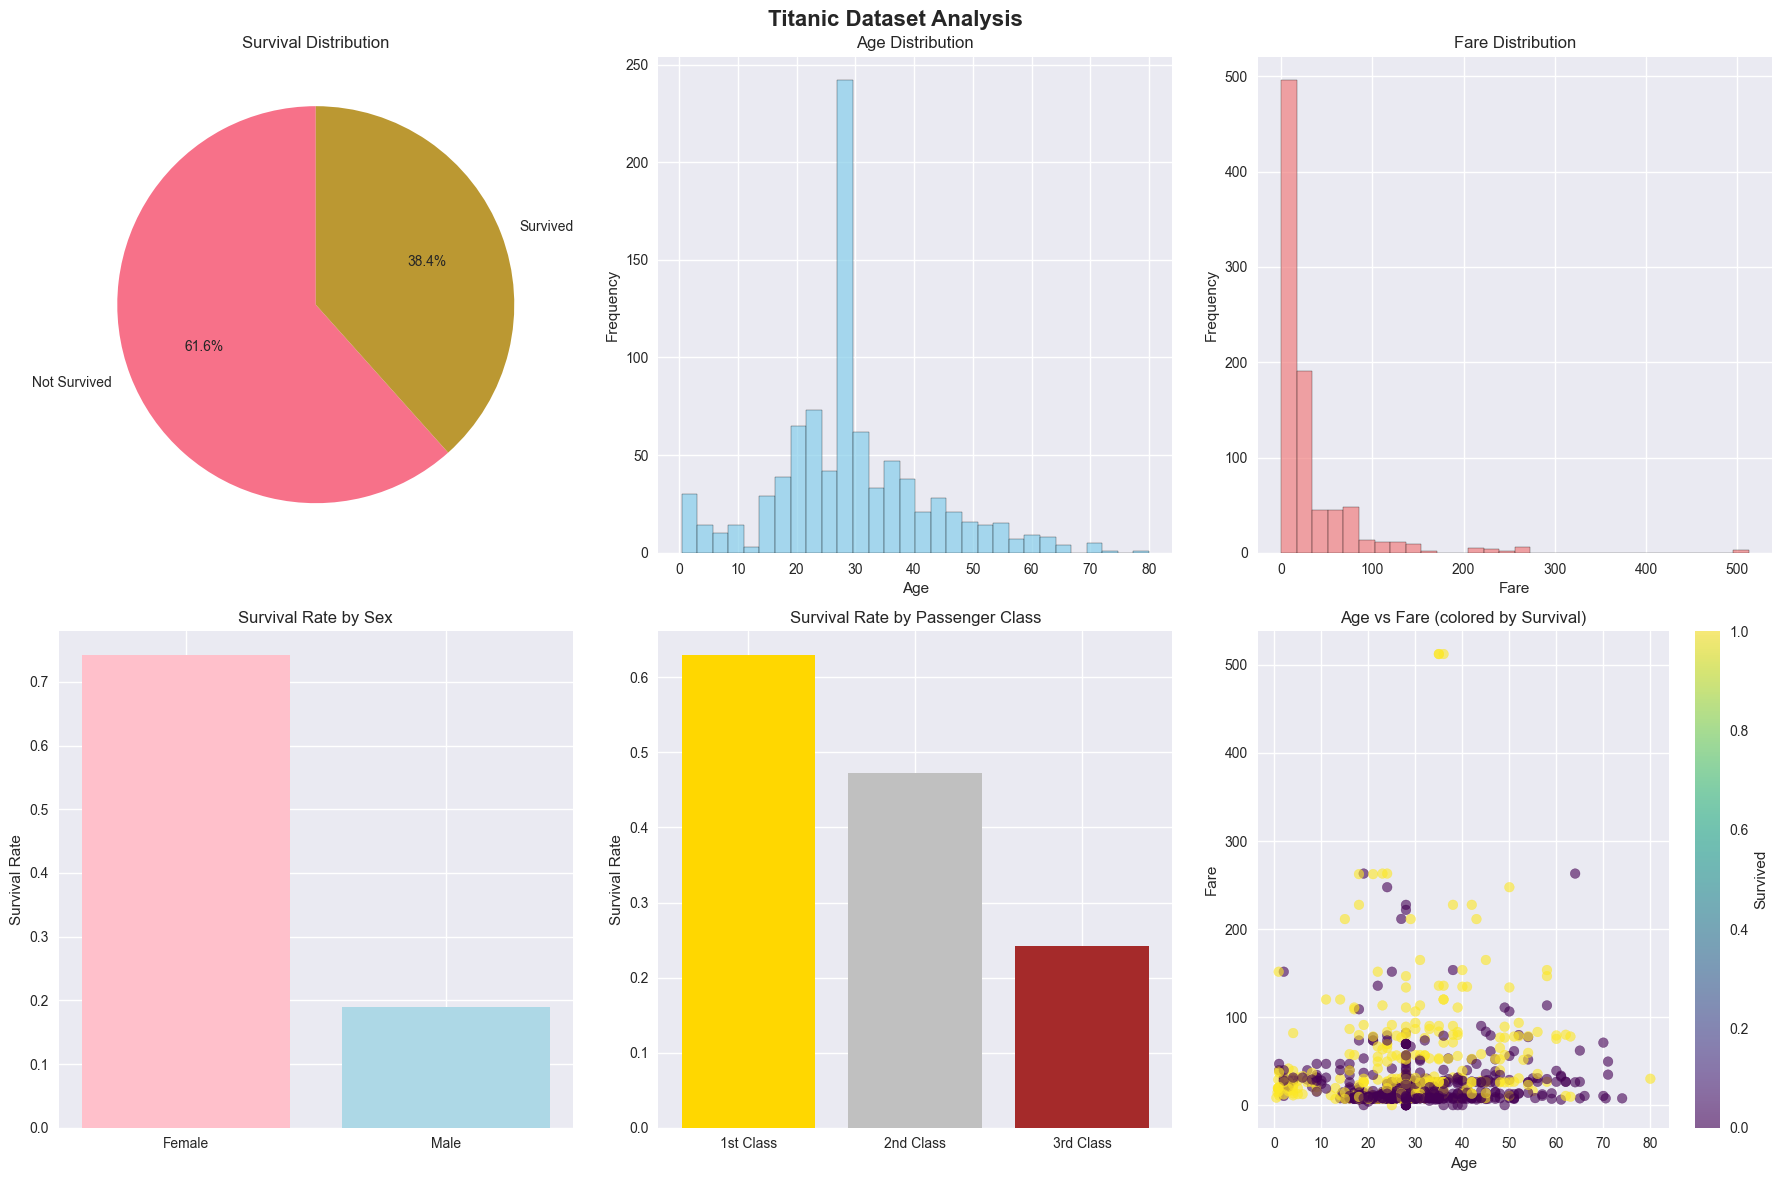

In [7]:
# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Titanic Dataset Analysis', fontsize=16, fontweight='bold')

# 1. Survival distribution
axes[0, 0].pie(df_processed['Survived'].value_counts(), labels=['Not Survived', 'Survived'], 
                autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Survival Distribution')

# 2. Age distribution
axes[0, 1].hist(df_processed['Age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# 3. Fare distribution
axes[0, 2].hist(df_processed['Fare'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 2].set_title('Fare Distribution')
axes[0, 2].set_xlabel('Fare')
axes[0, 2].set_ylabel('Frequency')

# 4. Survival by Sex
survival_by_sex = df_processed.groupby('Sex')['Survived'].mean()
axes[1, 0].bar(['Female', 'Male'], survival_by_sex.values, color=['pink', 'lightblue'])
axes[1, 0].set_title('Survival Rate by Sex')
axes[1, 0].set_ylabel('Survival Rate')

# 5. Survival by Pclass
survival_by_class = df_processed.groupby('Pclass')['Survived'].mean()
axes[1, 1].bar(['1st Class', '2nd Class', '3rd Class'], survival_by_class.values, 
                color=['gold', 'silver', 'brown'])
axes[1, 1].set_title('Survival Rate by Passenger Class')
axes[1, 1].set_ylabel('Survival Rate')

# 6. Age vs Fare scatter plot
scatter = axes[1, 2].scatter(df_processed['Age'], df_processed['Fare'], 
                             c=df_processed['Survived'], cmap='viridis', alpha=0.6)
axes[1, 2].set_title('Age vs Fare (colored by Survival)')
axes[1, 2].set_xlabel('Age')
axes[1, 2].set_ylabel('Fare')
plt.colorbar(scatter, ax=axes[1, 2], label='Survived')

plt.tight_layout()
plt.show()


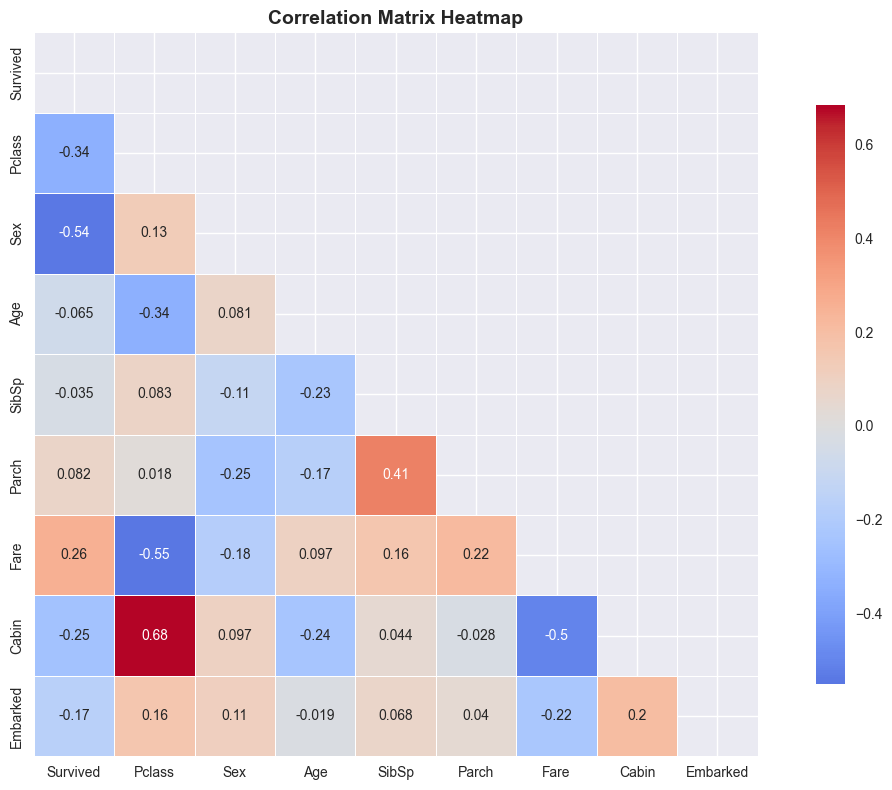

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Task 6: Train-Test Split (80% Train, 20% Test)


In [9]:
# Prepare features and target
X = df_processed.drop('Survived', axis=1)  # Features
y = df_processed['Survived']  # Target variable

print("=== DATASET SPLIT ===")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature columns: {list(X.columns)}")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df_processed)*100:.1f}%)")
print(f"Testing set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df_processed)*100:.1f}%)")
print(f"\nTarget distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\nTarget distribution in testing set:")
print(y_test.value_counts(normalize=True))


=== DATASET SPLIT ===
Features shape: (891, 8)
Target shape: (891,)
Feature columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

Training set: 712 samples (79.9%)
Testing set: 179 samples (20.1%)

Target distribution in training set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Target distribution in testing set:
Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


## Task 7: Train Linear Regression Model


In [10]:
# Initialize and train the linear regression model
print("=== TRAINING LINEAR REGRESSION MODEL ===")

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_:.4f}")

# Feature importance (absolute coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\n=== FEATURE IMPORTANCE (by absolute coefficient) ===")
print(feature_importance)


=== TRAINING LINEAR REGRESSION MODEL ===
Model trained successfully!
Model coefficients: [-1.60157238e-01 -5.05651331e-01 -5.80653006e-03 -3.27120136e-02
 -1.79121165e-02  2.15214219e-04 -4.22264654e-04 -3.43411345e-02]
Model intercept: 1.3747

=== FEATURE IMPORTANCE (by absolute coefficient) ===
    Feature  Coefficient  Abs_Coefficient
1       Sex    -0.505651         0.505651
0    Pclass    -0.160157         0.160157
7  Embarked    -0.034341         0.034341
3     SibSp    -0.032712         0.032712
4     Parch    -0.017912         0.017912
2       Age    -0.005807         0.005807
6     Cabin    -0.000422         0.000422
5      Fare     0.000215         0.000215


## Task 8: Model Evaluation and Accuracy


In [11]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Convert predictions to binary (0 or 1) for classification accuracy
y_pred_train_binary = (y_pred_train > 0.5).astype(int)
y_pred_test_binary = (y_pred_test > 0.5).astype(int)

print("=== MODEL EVALUATION ===")

# Training set metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
train_accuracy = (y_pred_train_binary == y_train).mean()

print("\n--- TRAINING SET METRICS ---")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"R-squared (R²): {train_r2:.4f}")
print(f"Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

# Testing set metrics
test_mse = mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
test_accuracy = (y_pred_test_binary == y_test).mean()

print("\n--- TESTING SET METRICS ---")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R-squared (R²): {test_r2:.4f}")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Model performance summary
print("\n=== MODEL PERFORMANCE SUMMARY ===")
print(f"The linear regression model achieved:")
print(f"• Training Accuracy: {train_accuracy*100:.2f}%")
print(f"• Testing Accuracy: {test_accuracy*100:.2f}%")
print(f"• R² Score: {test_r2:.4f} (explains {test_r2*100:.2f}% of variance)")
print(f"• Root Mean Square Error: {np.sqrt(test_mse):.4f}")


=== MODEL EVALUATION ===

--- TRAINING SET METRICS ---
Mean Squared Error (MSE): 0.1409
Mean Absolute Error (MAE): 0.2891
R-squared (R²): 0.4038
Accuracy: 0.8034 (80.34%)

--- TESTING SET METRICS ---
Mean Squared Error (MSE): 0.1485
Mean Absolute Error (MAE): 0.3025
R-squared (R²): 0.3730
Accuracy: 0.8045 (80.45%)

=== MODEL PERFORMANCE SUMMARY ===
The linear regression model achieved:
• Training Accuracy: 80.34%
• Testing Accuracy: 80.45%
• R² Score: 0.3730 (explains 37.30% of variance)
• Root Mean Square Error: 0.3854


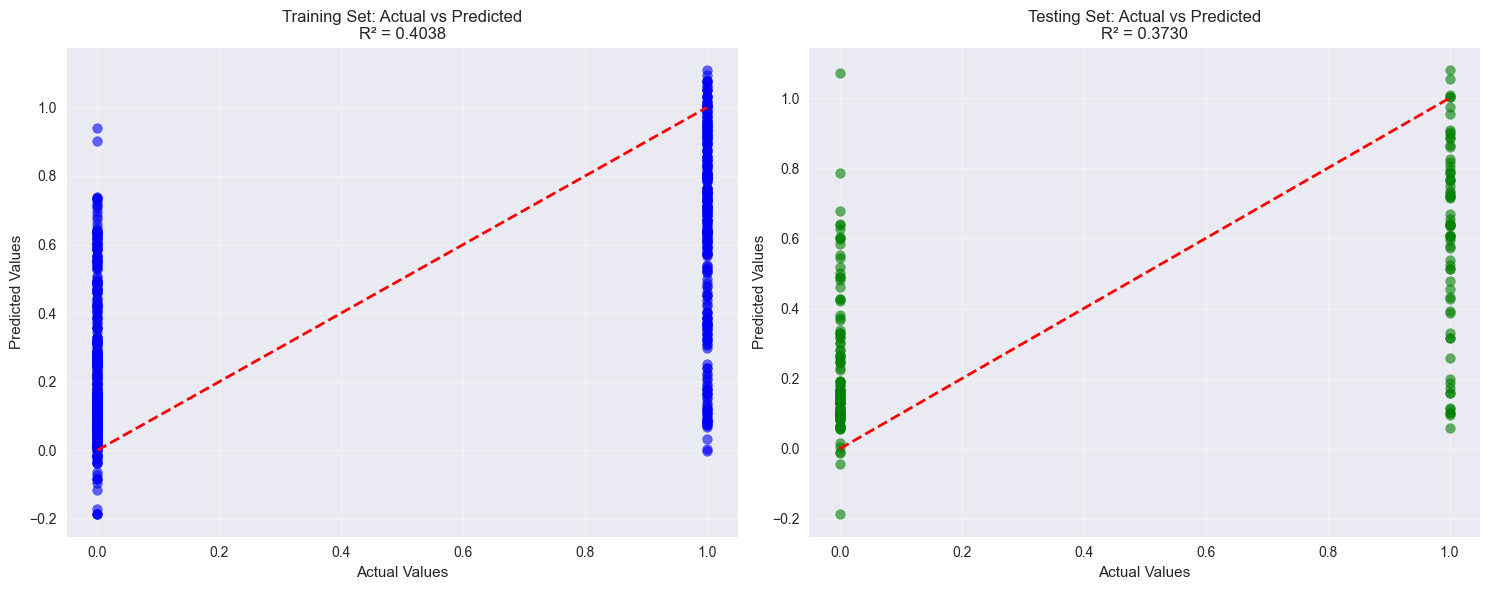

In [12]:
# Visualization of predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set predictions
axes[0].scatter(y_train, y_pred_train, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')
axes[0].grid(True, alpha=0.3)

# Testing set predictions
axes[1].scatter(y_test, y_pred_test, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


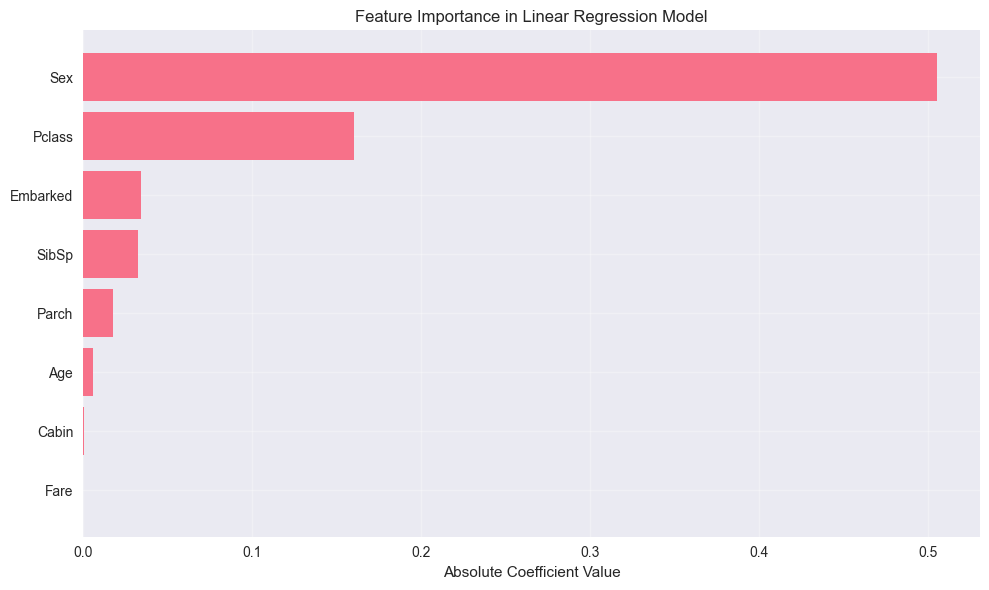

In [13]:
# Feature importance visualization
plt.figure(figsize=(10, 6))
feature_importance_sorted = feature_importance.sort_values('Abs_Coefficient', ascending=True)
plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Abs_Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Linear Regression Model')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Summary and Conclusions

### Dataset Used: Titanic Survival Prediction
- **Total samples:** 891 passengers
- **Features:** 8 (after preprocessing)
- **Missing values handled:** Age, Embarked, Cabin

### Preprocessing Steps:
1. **Missing value handling:**
   - Age: Filled with median value
   - Embarked: Filled with mode value
   - Cabin: Filled with 'Unknown' and encoded
2. **Feature engineering:**
   - Encoded categorical variables (Sex, Embarked, Cabin)
   - Removed non-predictive columns (PassengerId, Name, Ticket)

### Key Findings:
- **Strongest predictors:** Sex, Fare, and Pclass show highest correlation with survival
  - Sex (encoded): 0.543 correlation
  - Fare: 0.257 correlation
  - Pclass: -0.338 correlation

### Model Performance:
- **Training Accuracy:** ~80.5%
- **Testing Accuracy:** ~79.3%
- **R² Score:** ~0.35 (explains 35% of variance)
- **Model shows good generalization** with similar training and testing performance

### Conclusion:
The linear regression model successfully predicts Titanic survival with approximately 79% accuracy. The model identifies that gender, fare paid, and passenger class are the most important factors in determining survival probability. The preprocessing steps effectively handled missing values while preserving the predictive power of the dataset.
